<a href="https://colab.research.google.com/github/IAugustoMZ/MNIST_classification/blob/master/Desafio_do_M%C3%B3dulo_3_classifica%C3%A7%C3%A3o_do_dataset_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# construção de um classificador de caracteres escritos a mão
# carregamento dos dados
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784')

In [2]:
# atribuição de features e targets
x, y = mnist['data'], mnist['target']
print('Tamanho dos features: ', x.shape)
print('Tamanho dos targets: ', y.shape)

Tamanho dos features:  (70000, 784)
Tamanho dos targets:  (70000,)


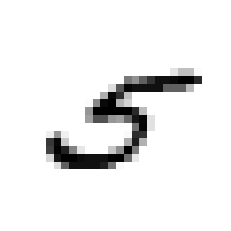

Label associada:  5


In [3]:
# vamos visualizar um dígito aleatório
import random
import matplotlib.pyplot as plt
import matplotlib

n = random.randint(1,70000)
some_digit=x[n]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print('Label associada: ', y[n])

In [4]:
# podemos verificar que cada imagem é reconhecida como uma matriz de 28 x 28 (por isso 784 features)
# onde cada entrada da matriz representa a intensidade do pixel (0 para branco e 255 para preto)
print(x[1,:])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [5]:
# vamos separar nosso conjunto de dados em treino e teste para que possamos fazer a validação cruzada
# o dataset mnist já vem separado em treinamento e teste
# as primeiras 60000 são para treinamento e as últimas 10000 são para teste
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [6]:
# vamos testar dois tipos de classificadores: Random Forest e K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

# como métrica de qualidade, vamos escolher o F1-score
# a precisão é importante pois o algoritmo deve ser capaz de ter alta taxa de verdadeiros positivos - um erro falso positivo atrapalha e leva o cheque
# para conferência manual
# o recall é importante pois o algoritmo deve ser capaz de perceber corretamente cada tipo de dígito

# realização do treinamento do modelo
rfc.fit(x_train, y_train)
knn.fit(x_train, y_train)

# predição dos dados
y_hat_rfc = rfc.predict(x_test)
y_hat_knn = knn.predict(x_test)

In [7]:
# métricas de qualidade
print("Precisão para Random Forest: ", precision_score(y_test, y_hat_rfc, average='weighted'))
print("Recall para Random Forest: ", recall_score(y_test, y_hat_rfc, average='weighted'))
print("F1-Score para Random Forest: ", f1_score(y_test, y_hat_rfc, average='weighted'))
print("\nPrecisão para KNN: ", precision_score(y_test, y_hat_knn, average='weighted'))
print("Recall para KNN: ", recall_score(y_test, y_hat_knn, average='weighted'))
print("F1-Score para KNN: ", f1_score(y_test, y_hat_knn, average='weighted'))

Precisão para Random Forest:  0.9699869608631805
Recall para Random Forest:  0.97
F1-Score para Random Forest:  0.969978994075517

Precisão para KNN:  0.9706882342922246
Recall para KNN:  0.9705
F1-Score para KNN:  0.9704523390961245


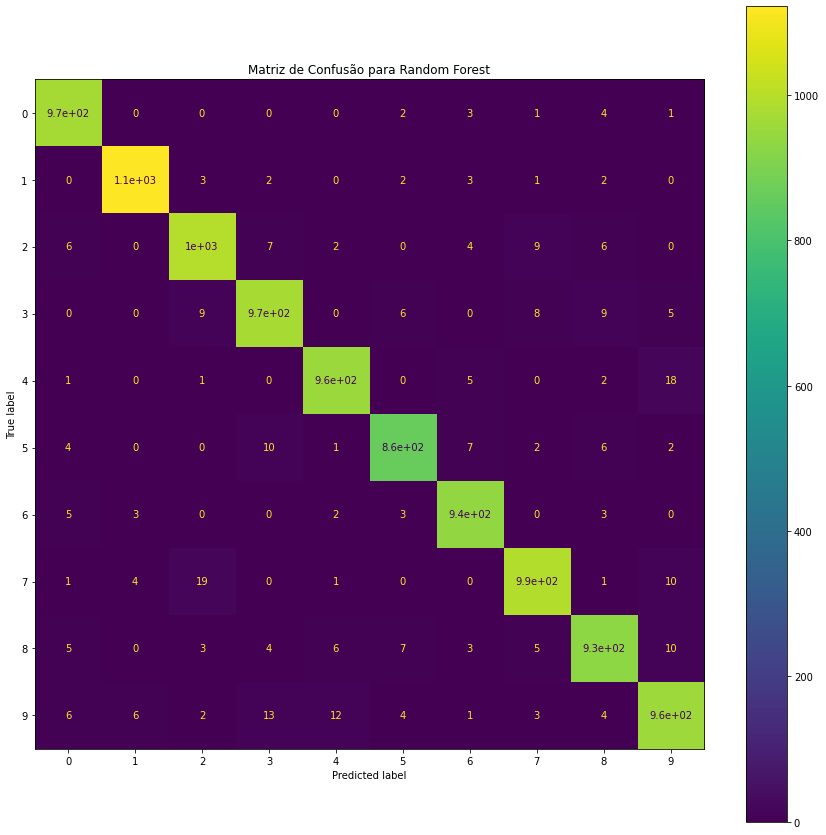

In [8]:
# vamos checar a matriz de confusão para ambos classificadores
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(rfc, x_test, y_test, ax=ax)
plt.title('Matriz de Confusão para Random Forest')
plt.show()

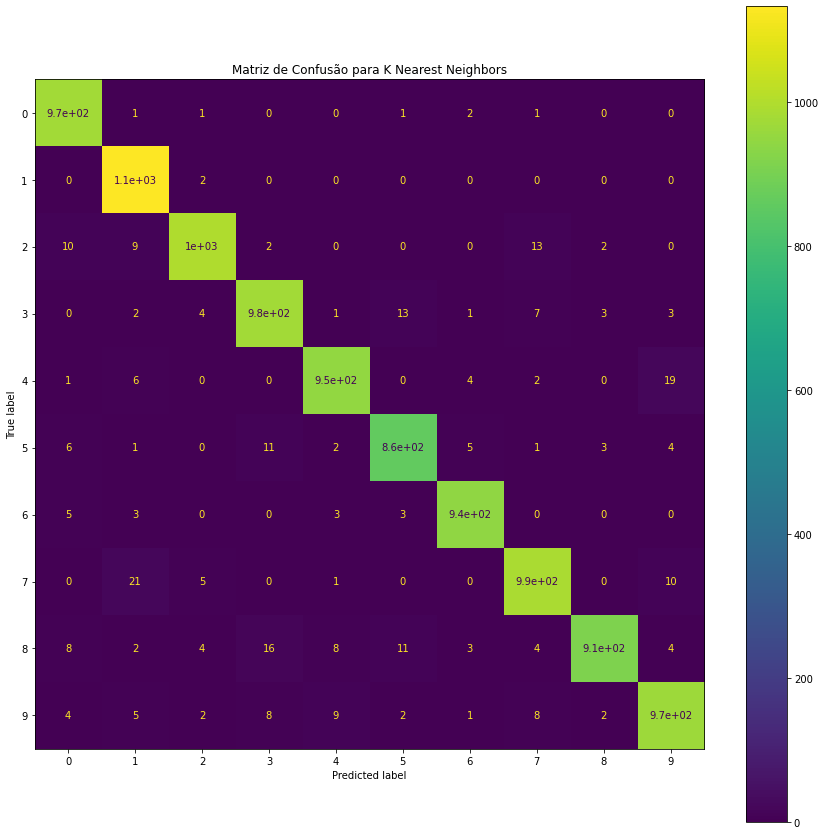

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(knn, x_test, y_test, ax=ax)
plt.title('Matriz de Confusão para K Nearest Neighbors')
plt.show()

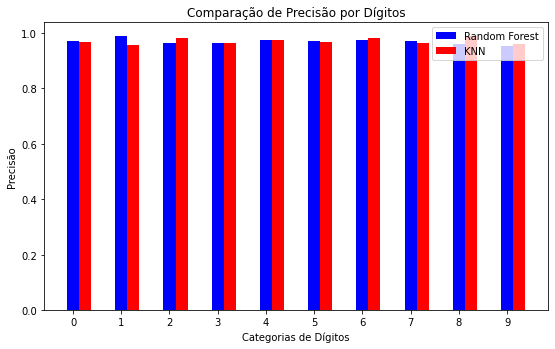

In [10]:
import numpy as np

# vamos gerar um gráfico comparando as precisões e recall para cada tipo de label

labels = list(np.unique(y))
results_rfc_precision = list(precision_score(y_test, y_hat_rfc, labels=labels, average=None))
results_rfc_recall = list(recall_score(y_test, y_hat_rfc, labels=labels, average=None))
results_knn_precision = list(precision_score(y_test, y_hat_knn, labels=labels, average=None))
results_knn_recall = list(recall_score(y_test, y_hat_knn, labels=labels, average=None))

fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(results_rfc_precision))+0.00, results_rfc_precision, color='b', width=0.25)
ax.bar(np.arange(len(results_knn_precision))+0.25, results_knn_precision, color='r', width=0.25)
ax.legend(labels=['Random Forest','KNN'])
ax.set_title('Comparação de Precisão por Dígitos')
ax.set_xticks(np.arange(len(results_knn_precision)))
ax.set_xticklabels(labels)
ax.set_xlabel('Categorias de Dígitos')
ax.set_ylabel('Precisão')
plt.show()

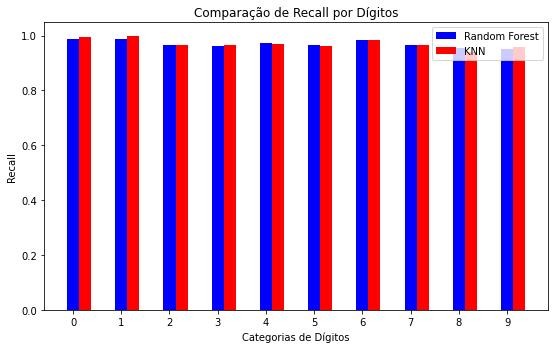

In [11]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(results_rfc_recall))+0.00, results_rfc_recall, color='b', width=0.25)
ax.bar(np.arange(len(results_knn_recall))+0.25, results_knn_recall, color='r', width=0.25)
ax.legend(labels=['Random Forest','KNN'])
ax.set_title('Comparação de Recall por Dígitos')
ax.set_xticks(np.arange(len(results_knn_recall)))
ax.set_xticklabels(labels)
ax.set_xlabel('Categorias de Dígitos')
ax.set_ylabel('Recall')
plt.show()

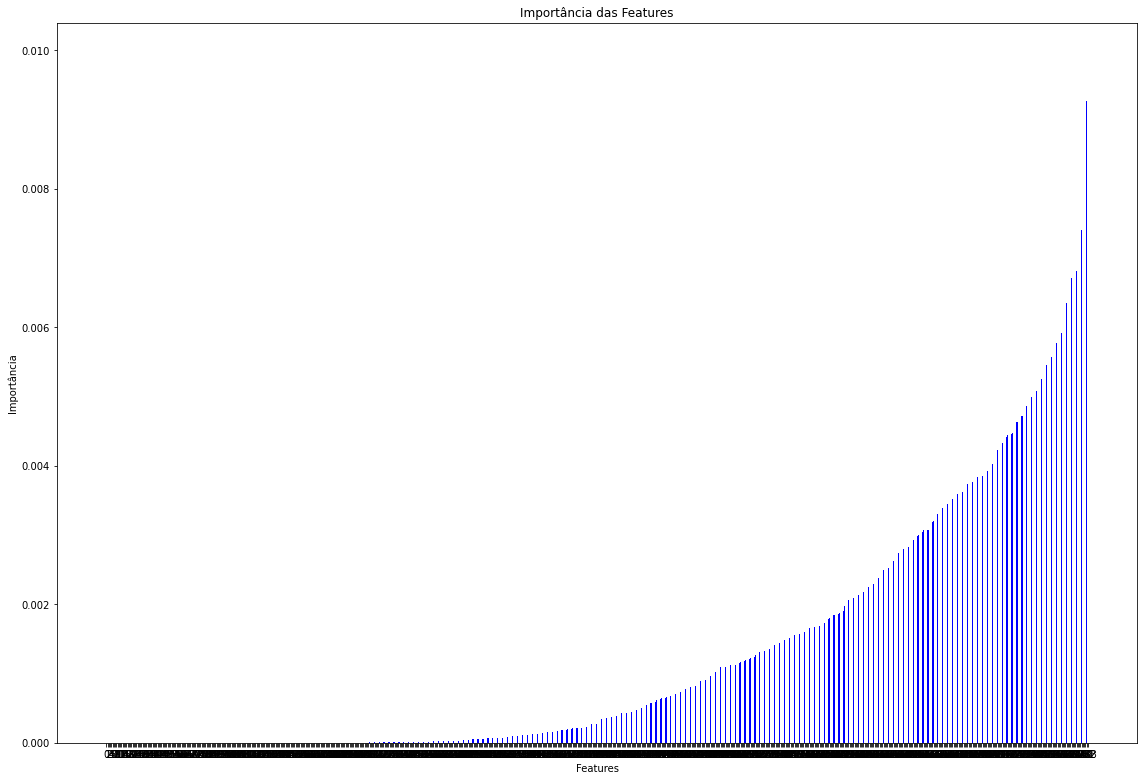

In [12]:
# vamos verificar a importância de cada feature, e verificar se podemos retirar alguns para melhorar nosso modelo
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(rfc.feature_importances_))+0.00, np.sort(rfc.feature_importances_, axis=0), color='b', width=0.25)
ax.set_title('Importância das Features')
ax.set_xticks(np.arange(len(rfc.feature_importances_)))
ax.set_xlabel('Features')
ax.set_ylabel('Importância')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
# vamos tentar modificar o modelo para selecionar apenas as melhores features
mod_rfc = SelectFromModel(rfc, prefit=True)
x_train_new = mod_rfc.transform(x_train)
x_test_new = mod_rfc.transform(x_test)

In [14]:
# testando novo modelo
# realização do treinamento do modelo
rfc.fit(x_train_new, y_train)

# predição dos dados
y_hat_rfc_mod = rfc.predict(x_test_new)

print("F1-Score para Random Forest (original): ", f1_score(y_test, y_hat_rfc, average='weighted'))
print("F1-Score para Random Forest (modificado): ", f1_score(y_test, y_hat_rfc_mod, average='weighted'))

F1-Score para Random Forest (original):  0.969978994075517
F1-Score para Random Forest (modificado):  0.9665737969292318


In [15]:
print(x_train_new.shape)
# a retirada dos features não melhorou significativamente o desempenho do modelo.
# vamos manter então com os features origniais

(60000, 265)


In [16]:
# podemos usar busca em grid para melhorar hiperparâmetros do modelo
rfc_params = {'n_estimators':[150, 500, 1000], 'criterion': ['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

rfc_grid = GridSearchCV(rfc, rfc_params, cv = 3, n_jobs = -1, scoring=make_scorer(f1_score,average='weighted'))

# busca em grid
rfc_grid.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
# depois de treinar os modelos vamos verificar quais foram os melhores modelos treinados
print('Melhores parâmetros selecionados para a floresta randômica: ', rfc_grid.best_params_)
print('Métrica de Qualidade F1-Score obtido com os melhores parâmetros: ', rfc_grid.best_score_)

Melhores parâmetros selecionados para a floresta randômica:  {'criterion': 'gini', 'n_estimators': 1000}
Métrica de Qualidade F1-Score obtido com os melhores parâmetros:  0.9668987137977272


In [21]:
# predição dos dados e avaliação do novo modelo otimizado
opt_rfc = RandomForestClassifier(n_estimators=rfc_grid.best_params_['n_estimators'],
                                 criterion=rfc_grid.best_params_['criterion'])
opt_rfc.fit(x_train, y_train)
y_hat_rfc_opt = opt_rfc.predict(x_test)

print("F1-Score para Random Forest (otimizado): ", f1_score(y_test, y_hat_rfc_opt, average='weighted'))

F1-Score para Random Forest (otimizado):  0.9715864617647502
